In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from .util import *

%matplotlib inline

In [2]:
df = pd.read_csv('var_w2.csv')
y = df['fraud_label']
df.drop(columns=['fraud_label'], inplace=True)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=0.2,
                                                    shuffle=False)
x_train, y_train = shuffle(x_train, y_train)
x_train.head()

,name_dob_day_since,ssn_day_since,name_count_0_by_30,ssn_dob_count_7,ssn_count_7,homephone_count_14,fulladdress_homephone_count_0_by_14,fulladdress_homephone_count_0_by_30,fulladdress_count_1_by_7,fulladdress_count_1_by_14,...,fulladdress_homephone_count_14,ssn_firstname_count_0_by_30,address_count_1_by_30,name_dob_count_14,ssn_lastname_count_0_by_14,homephone_count_3,ssn_lastname_count_7,ssn_firstname_count_7,name_count_7,ssn_count_0_by_14
113548,-1.183454,-1.166771,0.316329,-0.055708,-0.058092,0.708788,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
410263,-0.149087,-0.130294,0.316329,-0.055708,-0.058092,-0.437943,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
475599,0.078663,0.097921,0.316329,-0.055708,-0.058092,-0.437943,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
381067,-0.253473,-0.234893,0.316329,-0.055708,-0.058092,-1.011308,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
263705,-0.652036,-0.634269,0.316329,-0.055708,-0.058092,0.708788,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781


In [4]:
lr = LogisticRegression(max_iter=1000)
params = {'C': [10 ** i for i in range(-4, 1)],
          'class_weight': ['balanced', None]}
clf = GridSearchCV(lr, params, cv=10, refit='FDR', verbose=1,
                   scoring={'FDR': fdr, 'ROC': 'roc_auc'})
clf.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit='FDR', return_train_score=False,
             scoring={'FDR': <function fdr at 0x0000029E051EBAF8>,
                      'ROC': 'roc_auc'},
             verbose=1)

In [5]:
print(f"The best parameters are {clf.best_params_} "
      f"with a score of {clf.best_score_:0.5f}")

The best parameters are {'C': 0.001, 'class_weight': 'balanced'} with a score of 0.48300


In [6]:
pd.DataFrame(clf.cv_results_).filter(
    items=['mean_fit_time', 'mean_score_time',
           'params', 'mean_test_FDR','std_test_FDR',
           'rank_test_FDR', 'mean_test_ROC', 'std_test_ROC'])

,mean_fit_time,mean_score_time,params,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,3.730249,0.752796,"{'C': 0.0001, 'class_weight': 'balanced'}",0.482914,0.012098,2,0.754181,0.006836
1,2.483268,0.709616,"{'C': 0.0001, 'class_weight': None}",0.475766,0.012195,6,0.753990,0.007297
2,7.332690,0.698553,"{'C': 0.001, 'class_weight': 'balanced'}",0.483001,0.012832,1,0.753837,0.007571
3,4.009999,0.661338,"{'C': 0.001, 'class_weight': None}",0.471582,0.011453,10,0.750299,0.007203
4,12.778278,0.707685,"{'C': 0.01, 'class_weight': 'balanced'}",0.481519,0.012924,3,0.753407,0.007657
5,10.175446,0.727270,"{'C': 0.01, 'class_weight': None}",0.472715,0.011501,9,0.750370,0.006931
6,18.595750,0.822913,"{'C': 0.1, 'class_weight': 'balanced'}",0.481345,0.012782,4,0.753336,0.007720
7,19.383348,0.802549,"{'C': 0.1, 'class_weight': None}",0.472890,0.012351,8,0.750004,0.006872
8,18.067156,0.671642,"{'C': 1, 'class_weight': 'balanced'}",0.481083,0.012568,5,0.753324,0.007747
9,25.027273,0.694892,"{'C': 1, 'class_weight': None}",0.472977,0.012882,7,0.750074,0.006690


In [10]:
lr = LogisticRegression(max_iter=1000, **clf.best_params_)
lr.fit(x_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

FDR: 0.48510783978089694

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    197079
           1       0.13      0.53      0.21      2921

    accuracy                           0.94    200000
   macro avg       0.56      0.74      0.59    200000
weighted avg       0.98      0.94      0.96    200000



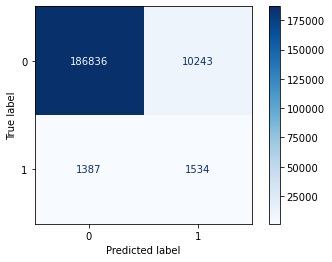

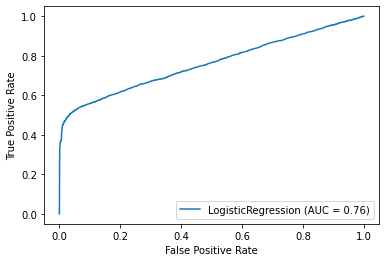

In [11]:
plot_report(lr, x_test, y_test)
